In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [77]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [78]:
violadores=total_data[total_data['crm_cd_desc'].isin([50, 3])]

In [79]:
violadores=violadores[violadores['area_name'].isin([1])]

In [80]:
violadores["vict_sex"].value_counts()

vict_sex
0    325
1      2
Name: count, dtype: int64

In [81]:
violadores=violadores[violadores['vict_sex'].isin([0])]

In [82]:
len(violadores)

325

In [83]:
violadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 4 to 320414
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      325 non-null    object 
 1   time_occ      325 non-null    int64  
 2   area_name     325 non-null    int64  
 3   crm_cd_desc   325 non-null    int64  
 4   vict_age      325 non-null    int64  
 5   vict_sex      325 non-null    int64  
 6   vict_descent  325 non-null    int64  
 7   premis_desc   325 non-null    int64  
 8   weapon_desc   325 non-null    int64  
 9   status_desc   325 non-null    int64  
 10  location      325 non-null    int64  
 11  lat           325 non-null    float64
 12  lon           325 non-null    float64
 13  weekday       325 non-null    int64  
 14  month         325 non-null    int64  
 15  mocodes_desc  325 non-null    int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 43.2+ KB


In [84]:
violadores.reset_index(inplace=True)

In [85]:
violadores=violadores[['vict_age','vict_descent','weekday']]

In [86]:
violadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   vict_age      325 non-null    int64
 1   vict_descent  325 non-null    int64
 2   weekday       325 non-null    int64
dtypes: int64(3)
memory usage: 7.7 KB


In [87]:
violadores.to_csv("../data/processed/rappist_data.csv",index=False)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

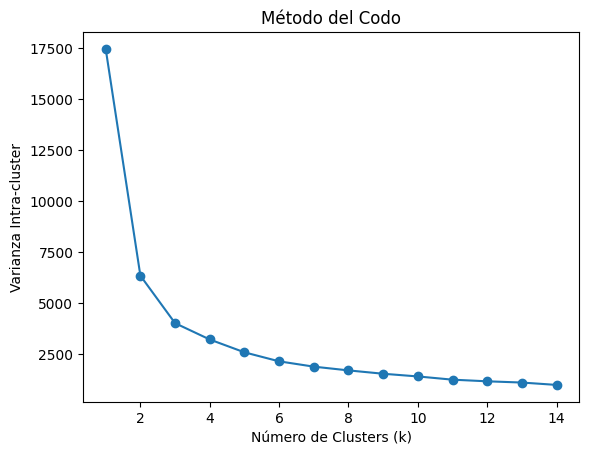

In [88]:
# Lista para almacenar la varianza intra-cluster para diferentes valores de k
inertia_values = []

# Prueba diferentes valores de k
for k in range(2, 30, 2):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(violadores)
    inertia_values.append(kmeans.inertia_)

# Dibuja el gráfico del método del codo
plt.plot(range(1, 15), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Varianza Intra-cluster')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

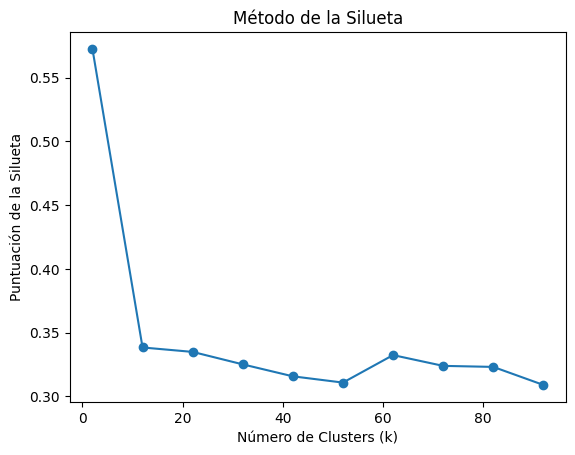

Número óptimo de clusters (k) según el método de la silueta: 2


In [89]:
# Probar diferentes valores de k
k_values = range(2, 100, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(violadores)
    
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(violadores, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

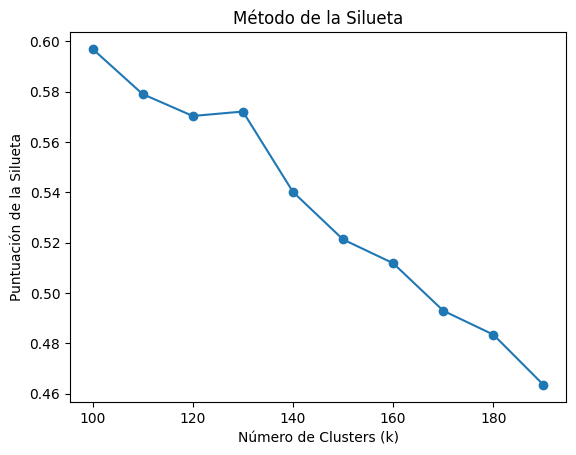

Número óptimo de clusters (k) según el método de la silueta: 100


In [48]:
# Probar diferentes valores de k
k_values = range(100, 200, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(violadores)
    
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(violadores, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [20]:
import os
import json

# Definir la ruta del archivo JSON y la carpeta de destino
json_file = "../data/processed/best_k.json"

# Cargar el contenido actual del archivo JSON
with open(json_file, 'r') as archivo:
    datos_json = json.load(archivo)

# Añadir un nuevo valor al JSON
nuevo_valor = optimal_k
datos_json["rappist_best_k"] = nuevo_valor

# Guardar los datos actualizados en el mismo archivo JSON
with open(json_file, 'w') as archivo:
    json.dump(datos_json, archivo, indent=2)

print(f"Se añadió el nuevo valor '{nuevo_valor}' al archivo JSON en {json_file}.")


Se añadió el nuevo valor '915' al archivo JSON en ../data/processed/best_k.json.


In [90]:
X = violadores
X_train, X_test = train_test_split(X, test_size=0.2, random_state=14)

In [91]:
X_train.to_csv("../data/processed/rapists_X_train.csv", index=False)
X_test.to_csv("../data/processed/rapists_X_test.csv", index=False)